<a href="https://colab.research.google.com/github/Buzzrightear/CO885_dissertation/blob/master/Simple_Moving_Average.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Taken from here: https://www.analyticsvidhya.com/blog/2018/02/time-series-forecasting-methods/

https://towardsdatascience.com/implementing-moving-averages-in-python-1ad28e636f9d

In [1]:
import pandas as pd
import numpy as np
from statsmodels.tsa.vector_ar.var_model import VAR
from random import random

import matplotlib
matplotlib.use('Agg') #https://stackoverflow.com/questions/37604289/tkinter-tclerror-no-display-name-and-no-display-environment-variable 
import matplotlib.pyplot as plt
import math
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error
from math import sqrt

/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [2]:
#Import data

df = pd.read_csv('https://raw.githubusercontent.com/Buzzrightear/CO885_dissertation/master/wind_data_3.csv', parse_dates=['Date time']) #Read in csv to dataframe
df=df[['Date time','Power avg']].dropna()

In [3]:
def intervals():
  intervalsList = [["4 years", 4*365*144],["Year", 365*144], ["Week", 7*144], ["Day", 144], ["12 hours", 72], ["Hour", 6], ["10 minutes", 2]]
  for i in intervalsList:
    prediction(i[0],i[1])

In [15]:
def prediction(name, interval):
  chart_title = name + " prediction"
  df_training = df.head(df.shape[0]-interval)
  df_test = df.tail(interval)
  print(df_training.head())


  dd= np.asarray(df_training)


  y_hat_avg = df_test.copy()
  y_hat_avg['Moving average'] = df_test['Power avg'].rolling(window = 6).mean()#.iloc[-1]
  
  print(y_hat_avg.head())

  EPSILON = 1e-10
  #predictions = rf.predict(features.drop('Date time', axis=1)) # Each call to this function just gives a set of features (dates) as a param and returns a dataframe of 'labels' (power avg values)
  errors = abs(y_hat_avg['Moving average'] - df_test['Power avg']) #predicted values numpy array minus actual values numpy array returns numpy array 'errors'
    
  # MAE = mean abs error; MAX_AE = max absolute error (largest single error in prediction by rf); RMSE = Root Mean Square Error (gets rid of negatives and more sensitive to large errors than MAPE);
  # MAPE = mean absolute percentage error (MAPE is a straightforward measure of the prediction accuracy of a forecasting method, and is thus usually considered as the fairest indicator https://www.mdpi.com/2071-1050/12/6/2247/htm#B37-sustainability-12-02247)
  title= chart_title + ' MAE:' + str(round(np.mean(errors), 2)) + \
          ' MAX_AE:' + str(round(np.max(abs(errors)), 2)) + \
          ' RMSE:' + str(round(np.sqrt(np.mean(np.square(errors))), 2)) + \
          ' MAPE:' + str(round(((np.mean(errors)/np.mean((abs(df_test['Power avg']+EPSILON))))*100),2)) + "% " # https://www.mdpi.com/2071-1050/12/6/2247/htm  Doesn't really work when you have zero values, which we do because sometimes the wind doesn't blow

  #Create dataframe comprising three elements: 'labels' (actual Power avg values), 'predictions' (predicted 'power avg' values), 'features' (Date time values) and then plot them
  pd.DataFrame({'Test set': df_test['Power avg'], 
                  'Predictions': y_hat_avg['Moving average'], 
                  'Date time': df_test['Date time']}).plot(title=title, x='Date time')

  print(y_hat_avg['Moving average'].shape[0])

            Date time  Power avg
0 2011-09-01 00:10:00       78.0
1 2011-09-01 00:20:00       77.0
2 2011-09-01 00:30:00       72.0
3 2011-09-01 00:40:00       70.0
4 2011-09-01 00:50:00       62.0
                 Date time  Power avg  Moving average
170757 2014-12-27 13:30:00        0.0             NaN
170758 2014-12-27 13:40:00        0.0             NaN
170759 2014-12-27 13:50:00        1.0             NaN
170760 2014-12-27 14:00:00        0.0             NaN
170761 2014-12-27 14:10:00        0.0             NaN
52560
            Date time  Power avg
0 2011-09-01 00:10:00       78.0
1 2011-09-01 00:20:00       77.0
2 2011-09-01 00:30:00       72.0
3 2011-09-01 00:40:00       70.0
4 2011-09-01 00:50:00       62.0
                 Date time  Power avg  Moving average
222309 2015-12-24 23:30:00      154.0             NaN
222310 2015-12-24 23:40:00      230.0             NaN
222311 2015-12-24 23:50:00      232.0             NaN
222312 2015-12-25 12:00:00      294.0             NaN
2223

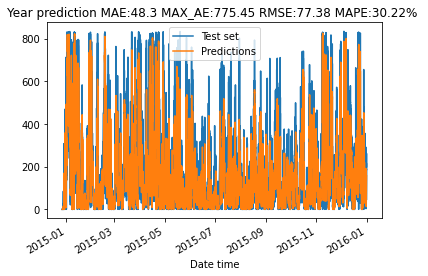

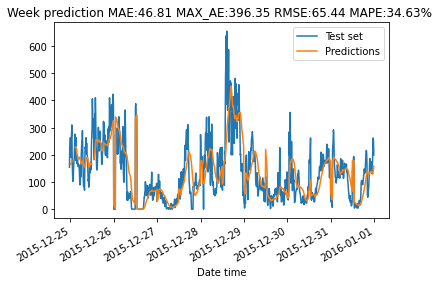

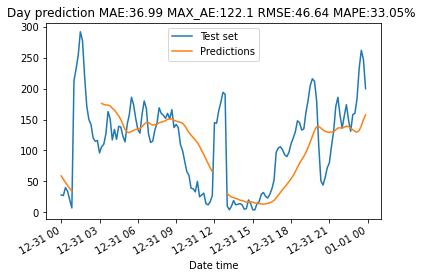

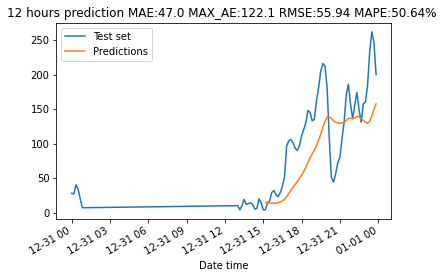

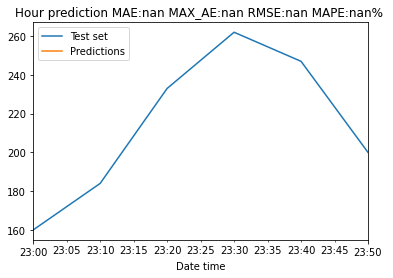

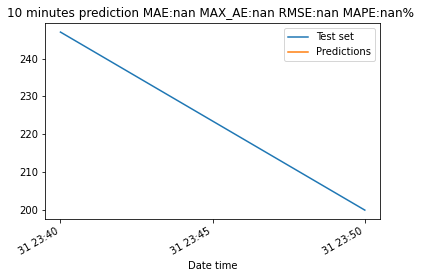

In [17]:
intervals()